### Want to plot out the grouped firing rates for features, RPEs for interesting units

In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils
import utils.behavioral_utils as behavioral_utils

import os
import pandas as pd
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
sess_name = 20180803

In [27]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
OUTPUT_DIR = "/data/patrick_res/information"

SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"
SESS_BEHAVIOR_PATH = "/data/rawdata/sub-SA/sess-{sess_name}/behavior/sub-SA_sess-{sess_name}_object_features.csv"

PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 50
SMOOTH = 1
EVENT = "FeedbackOnset"
fr_path = f"/data/patrick_res/firing_rates/{sess_name}_firing_rates_{PRE_INTERVAL}_{EVENT}_{POST_INTERVAL}_{INTERVAL_SIZE}_bins_{SMOOTH}_smooth.pickle"


In [28]:
valid_sess = pd.read_pickle(SESSIONS_PATH)

In [29]:
behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=sess_name)
beh = pd.read_csv(behavior_path)

# filter trials 
valid_beh = behavioral_utils.get_valid_trials(beh)
feature_selections = behavioral_utils.get_selection_features(valid_beh)
valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber")
valid_beh_rpes = behavioral_utils.get_rpes_per_session(sess_name, valid_beh)

In [30]:
neg_med = valid_beh_rpes[valid_beh_rpes.RPE_FE < 0].RPE_FE.median()
pos_med = valid_beh_rpes[valid_beh_rpes.RPE_FE > 0].RPE_FE.median()
print(f"Negative median {neg_med}")
print(f"Positive median {pos_med}")

# add median labels to 
def add_group(row):
    rpe = row.RPE_FE
    group = None
    if rpe < neg_med:
        group = "more neg"
    elif rpe >= neg_med and rpe < 0:
        group = "less neg"
    elif rpe >= 0 and rpe < pos_med:
        group = "less pos"
    elif rpe >= pos_med:
        group = "more pos"
    row["RPEGroup"] = group
    return row
valid_beh = valid_beh_rpes.apply(add_group, axis=1)

Negative median -0.23530183353699086
Positive median 0.2700037023201789


In [31]:
frs = pd.read_pickle(fr_path)
pos = spike_utils.get_unit_positions_per_sess(sess_name)
pos = pos.fillna("unknown")
pos = spike_utils.get_manual_structure(pos)

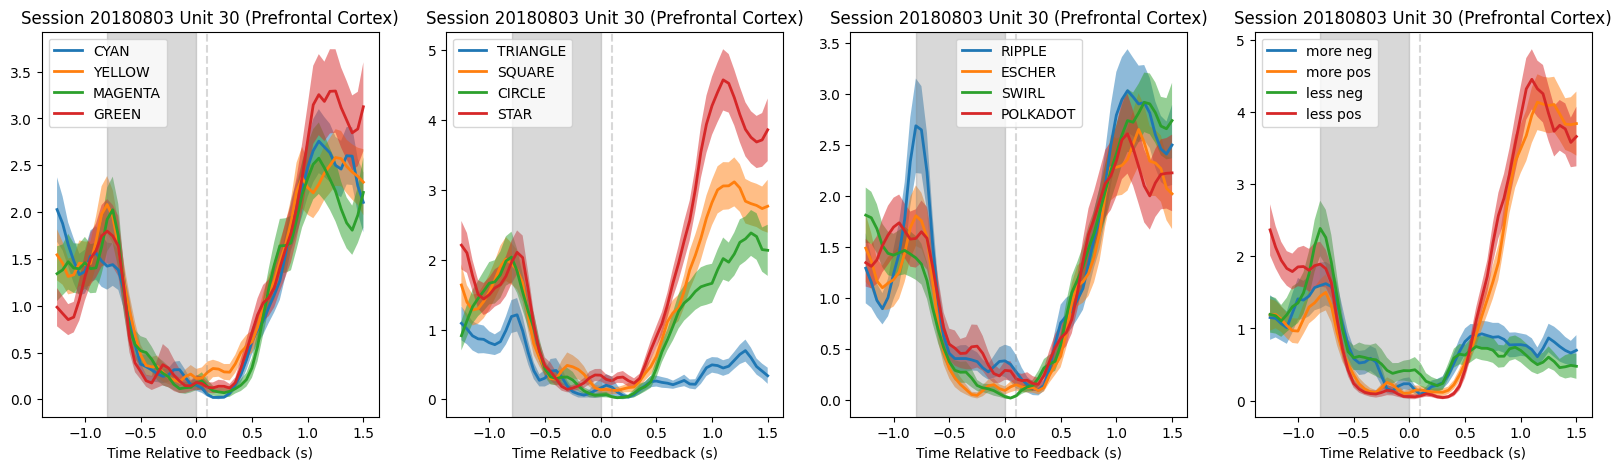

In [33]:
unit = 30
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="FiringRate", group_colors=None)

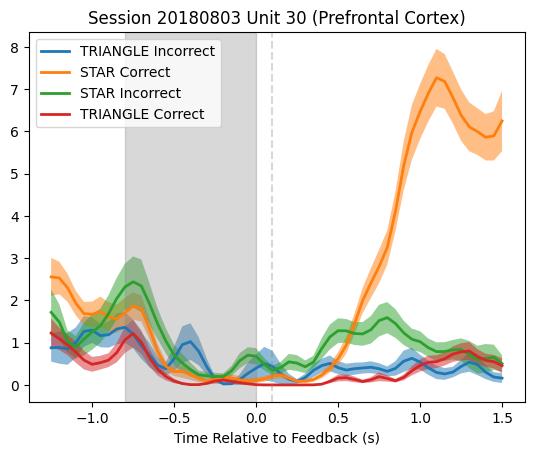

In [34]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Shape"] + " " + valid_beh["Response"]
# sub_beh = valid_beh[valid_beh.Shape.isin(["STAR", "TRIANGLE"]) & valid_beh.RPEGroup.isin(["more pos", "less pos"])]
sub_beh = valid_beh[valid_beh.Shape.isin(["STAR", "TRIANGLE"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

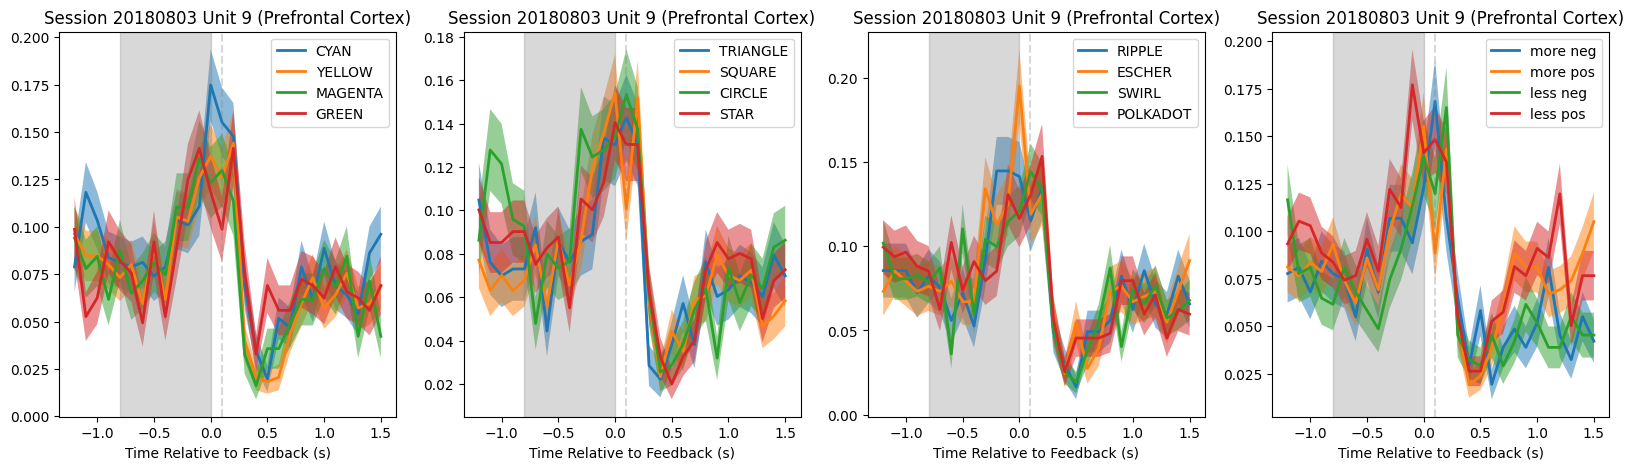

In [23]:
unit = 9
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="SpikeCounts", group_colors=None)


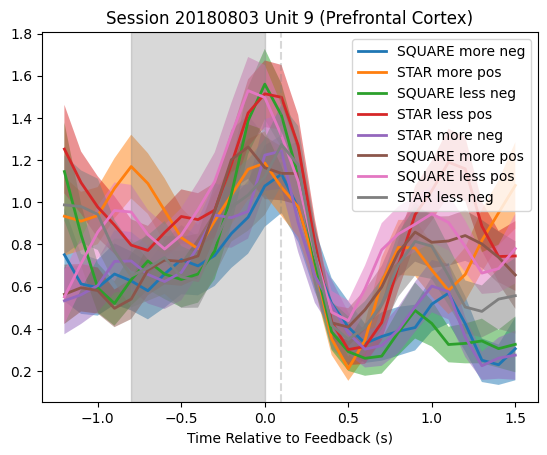

In [24]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Shape"] + " " + valid_beh["RPEGroup"]
sub_beh = valid_beh[valid_beh.Shape.isin(["SQUARE", "STAR"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

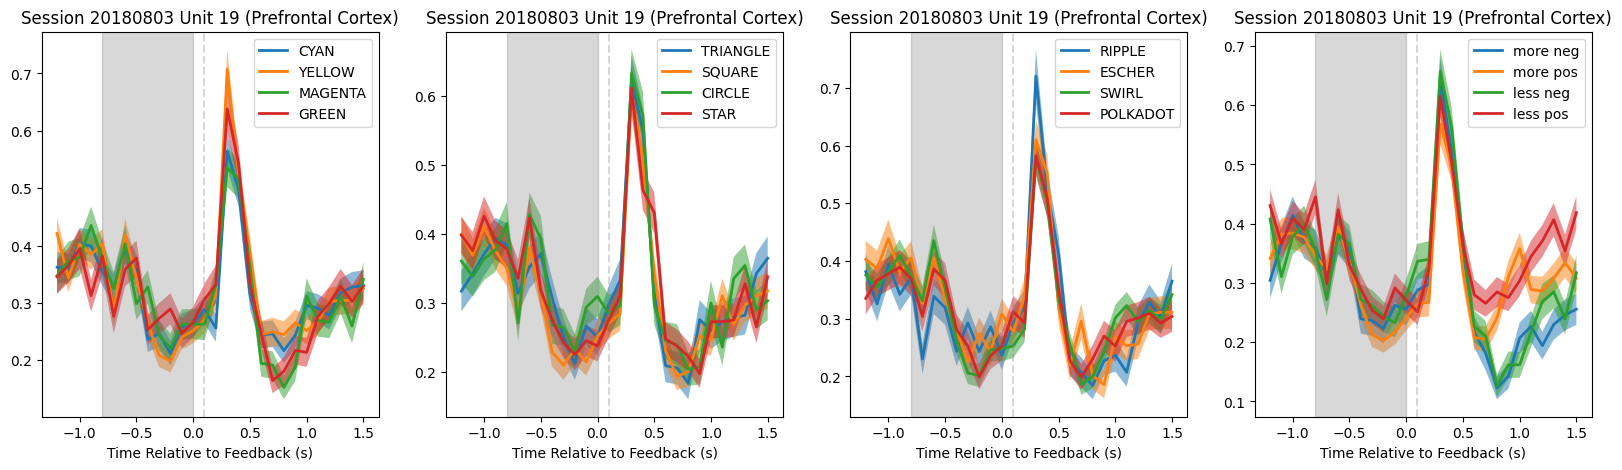

In [25]:
unit = 19
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="SpikeCounts", group_colors=None)


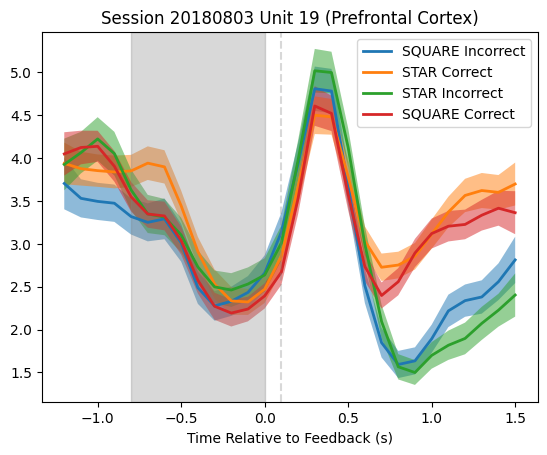

In [26]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Shape"] + " " + valid_beh["Response"]
sub_beh = valid_beh[valid_beh.Shape.isin(["STAR", "SQUARE"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

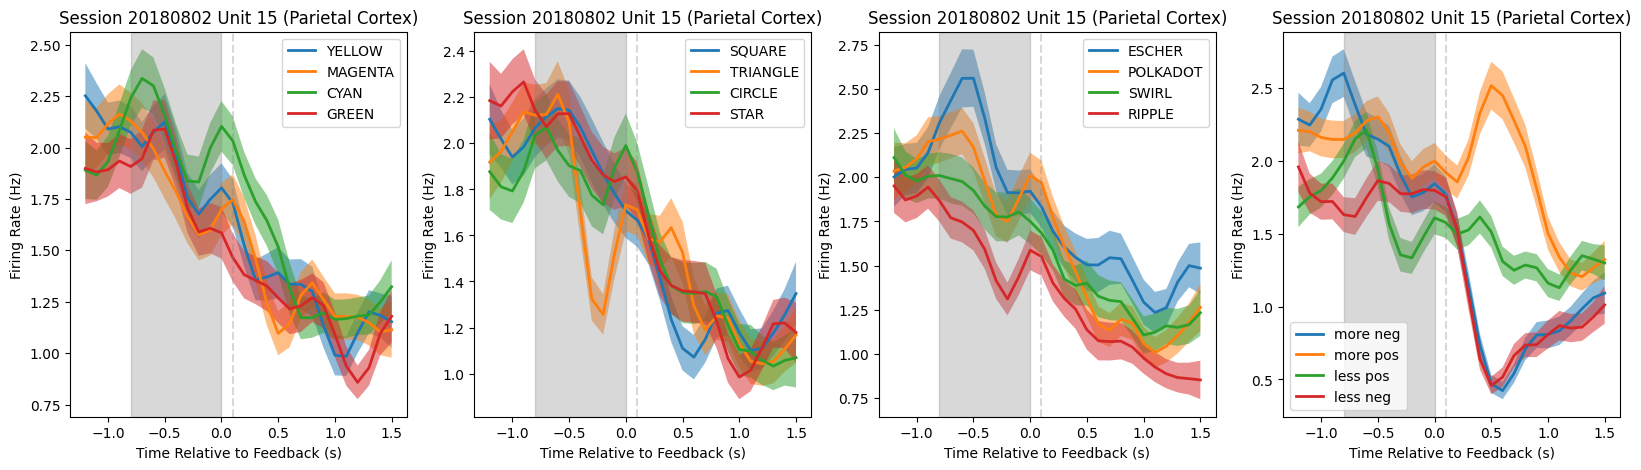

In [16]:
unit = 15
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="FiringRate", group_colors=None)


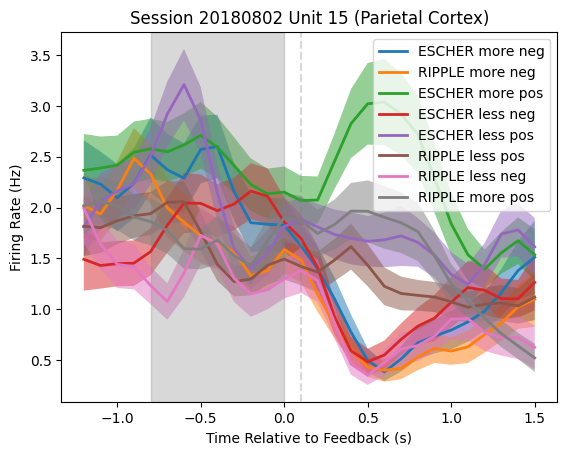

In [18]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Pattern"] + " " + valid_beh["RPEGroup"]
sub_beh = valid_beh[valid_beh.Pattern.isin(["ESCHER", "RIPPLE"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

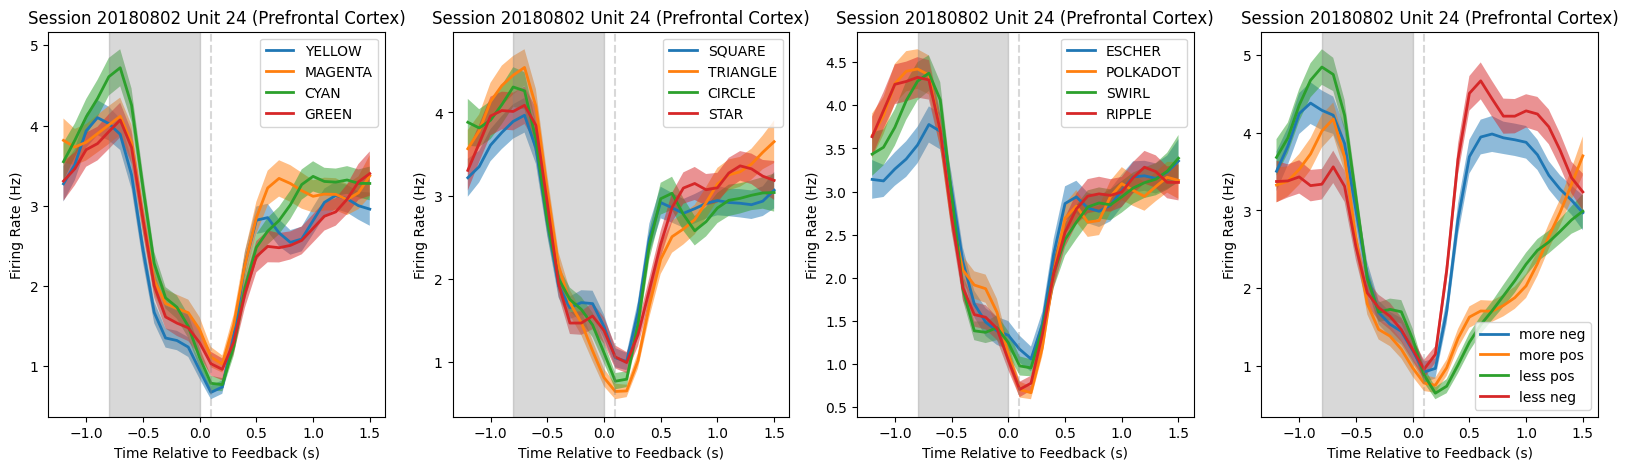

In [19]:
unit = 24
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="FiringRate", group_colors=None)


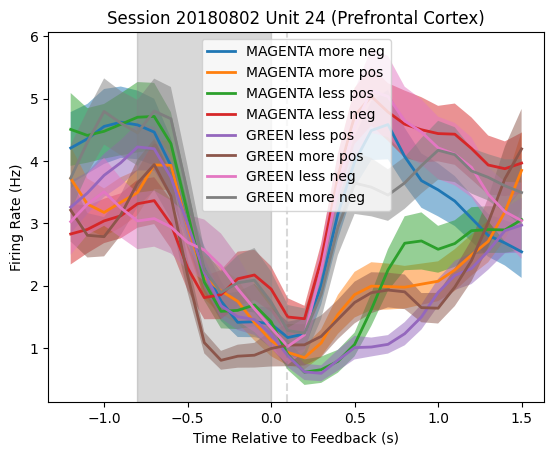

In [21]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Color"] + " " + valid_beh["RPEGroup"]
sub_beh = valid_beh[valid_beh.Color.isin(["MAGENTA", "GREEN"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

### What if we look at YELLOW colors, but split by: 
- first 5 vs last 5 corrects
- out of the last 5 corrects, when yellow is the rule vs when yellow is not the rule

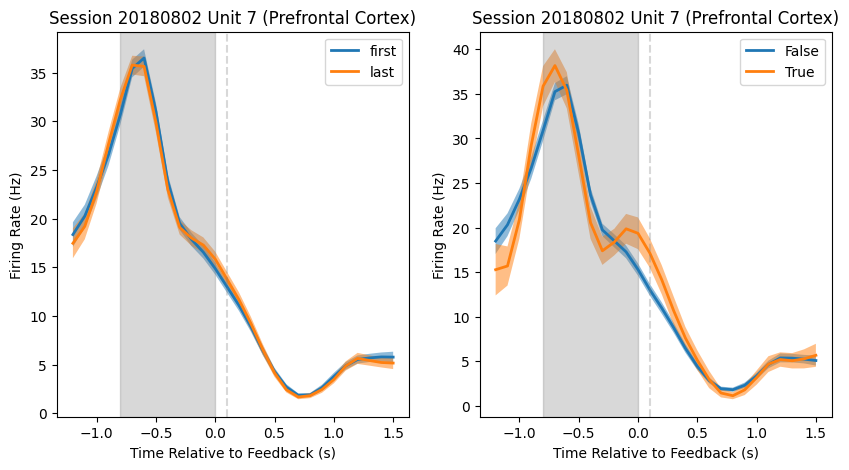

In [11]:
yellow_beh = valid_beh[valid_beh.Color == "YELLOW"]
first_fives = behavioral_utils.get_first_n_corrects_per_block(yellow_beh, 5)
first_fives["pos"] = "first"
last_fives = behavioral_utils.get_last_n_corrects_per_block(yellow_beh, 3)
last_fives["pos"] = "last"
first_last = pd.concat((first_fives, last_fives))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, first_last, "pos", pos, axs[0], mode="FiringRate", group_colors=None)
last_fives = behavioral_utils.get_last_n_corrects_per_block(yellow_beh, 5)
last_fives["is_rule_yellow"] = last_fives.CurrentRule == "YELLOW"
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, last_fives, "is_rule_yellow", pos, axs[1], mode="FiringRate", group_colors=None)


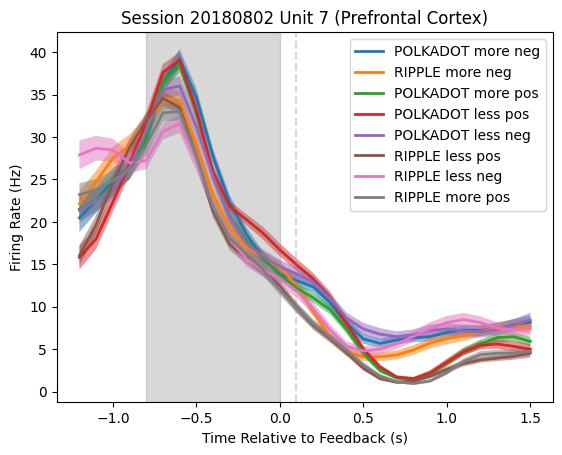

In [12]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Pattern"] + " " + valid_beh["RPEGroup"]
sub_beh = valid_beh[valid_beh.Pattern.isin(["RIPPLE", "POLKADOT"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

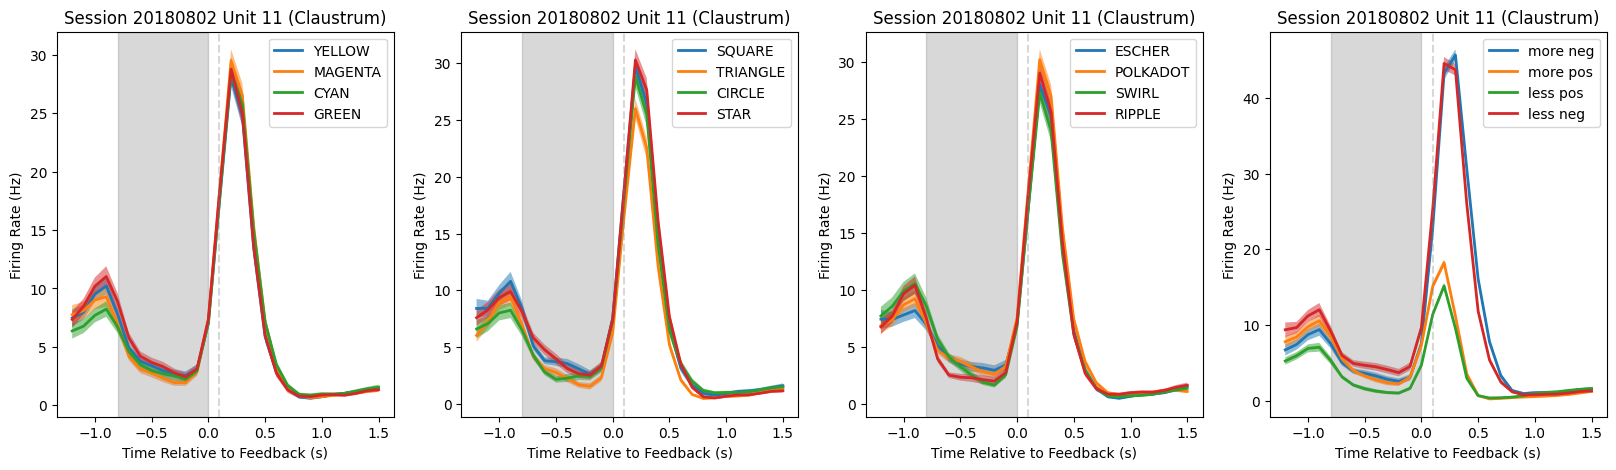

In [13]:
unit = 11
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="FiringRate", group_colors=None)


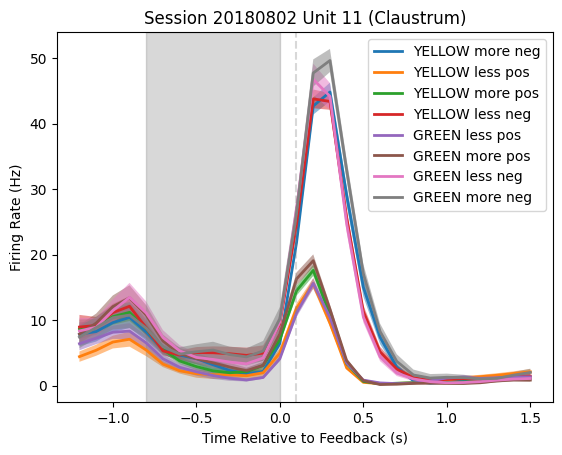

In [14]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Color"] + " " + valid_beh["RPEGroup"]
sub_beh = valid_beh[valid_beh.Color.isin(["YELLOW", "GREEN"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

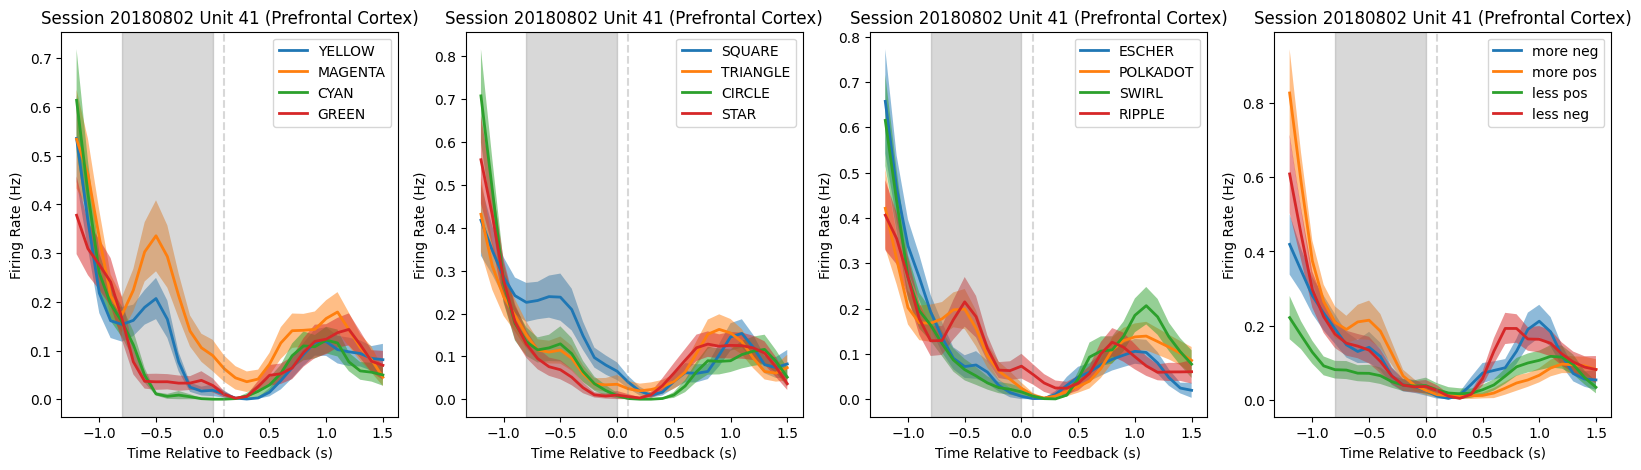

In [15]:
unit = 41
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="FiringRate", group_colors=None)


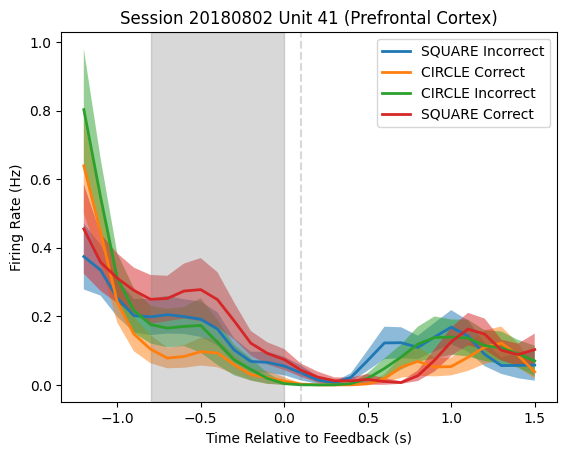

In [16]:
fig, ax = plt.subplots()
valid_beh["combined"] = valid_beh["Shape"] + " " + valid_beh["Response"]
sub_beh = valid_beh[valid_beh.Shape.isin(["SQUARE", "CIRCLE"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)

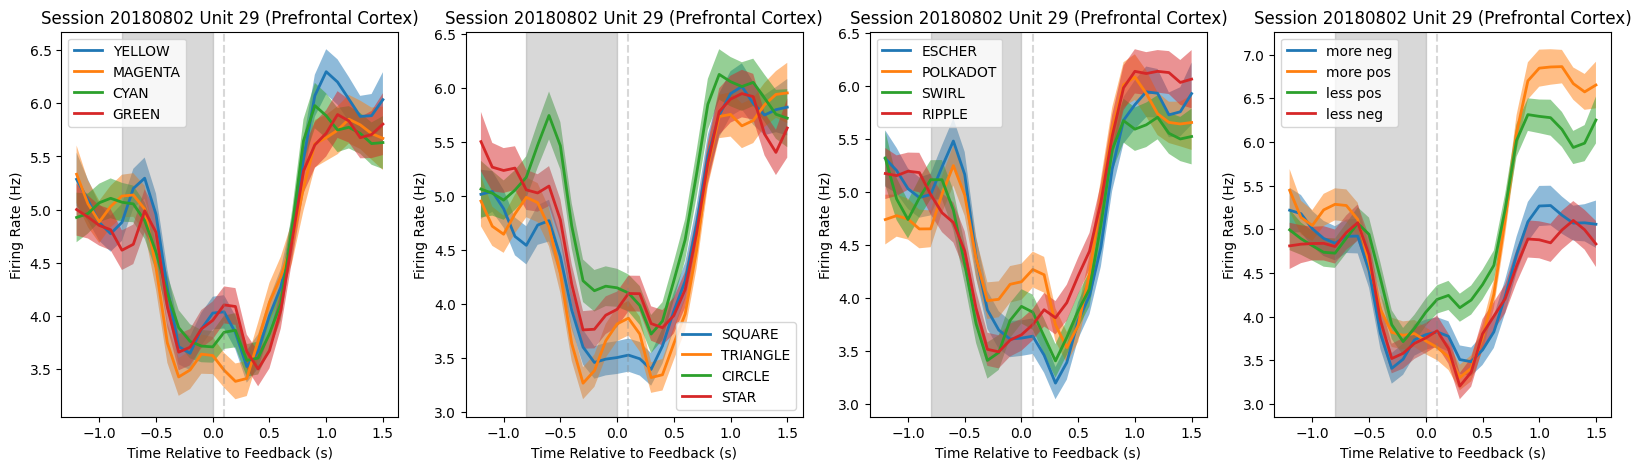

In [17]:
unit = 29
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="FiringRate", group_colors=None)



In [18]:
valid_beh["combined"] = valid_beh["Color"] + " " + valid_beh["RPEGroup"]

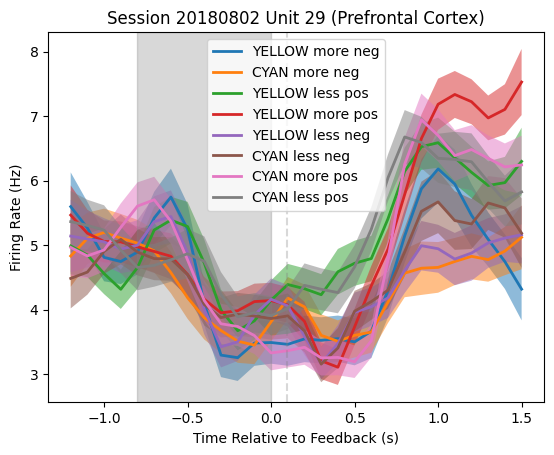

In [19]:
unit = 29
fig, ax = plt.subplots()
sub_beh = valid_beh[valid_beh.Color.isin(["YELLOW", "CYAN"])]
visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, sub_beh, "combined", pos, ax, mode="FiringRate", group_colors=None)



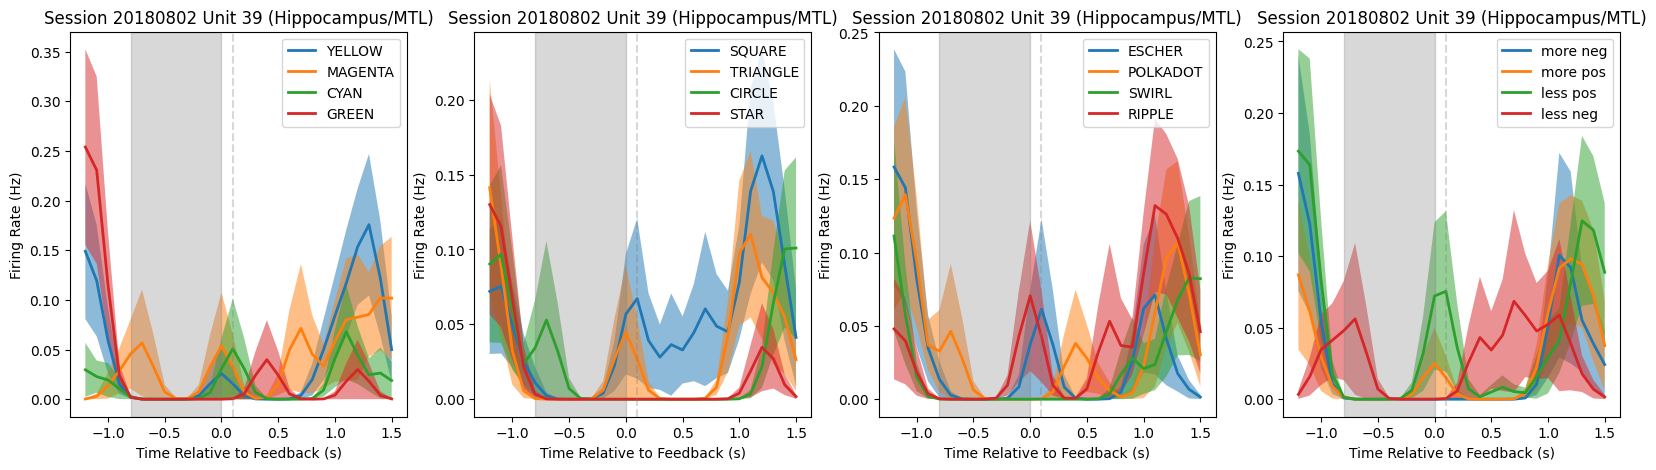

In [20]:
unit = 39
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
group_names = FEATURE_DIMS + ["RPEGroup"]
for i, group_name in enumerate(group_names):
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, group_name, pos, axs[i], mode="FiringRate", group_colors=None)

